## 线性模型的正则化

### 准备数据

准备20组带有噪音的线性数据：$y=1+0.5x$

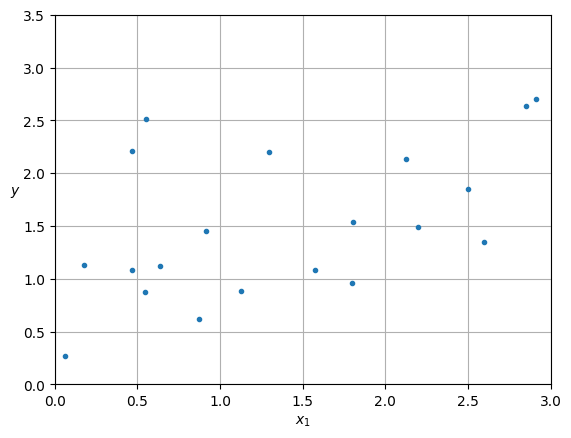

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

plt.figure()
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

### 岭回归

岭回归的损失函数是：

$$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n}\theta_i^2$$

对于线性回归的岭回归，我们可以使用封闭方程去计算，也可以使用梯度下降去计算。

岭回归的封闭方程的解如下：

$$\hat{\theta}=(X^T \cdot X + \alpha A)^{-1} \cdot X^T \cdot y$$

下面使用`Scikit-Learn`提供的`Ridge`来进行封闭方程的岭回归求解。其中，`cholesky`表示使用`Cholesky`法进行矩阵分解对上面的公式进行变形。

In [7]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

同样的，我们可以用`Scikit-Learn`提供随机梯度下降算法`SGDRegressor`实现岭回归。其中，`penalty`参数指的是正则项的惩罚类型。指定`l2`表明要在损失函数上添加一项：权重向量 $ \ell^2 $ 番薯平方的一半，即简单的岭回归。

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
ridge_reg.predict([[1.5]])

array([[1.55325833]])